## Final Pipeline
After running the Genetic Algorithm to find the most suited individual, or easily saying, to find the best combination of lexicons, the analysis of the evolution of the population can be checked.

It is also important to create the final pipeline or the Sentiment Analysis as so far not all the dataset was used to train the model.

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import libs.files as fh
import libs.parse as p
import libs.pipeline as pipe
import libs.utils as u
import libs.resources as r
import numpy as np
from IPython.display import display

### Population Development 

In [37]:
def print_evolution(gen, avg, min_, max_):
#     gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
#     fig, axs = plt.subplots(1,2, )
    plt.figure(figsize = (13,5))
    plt.plot(gen, avg, label="average", marker='.')
    plt.plot(gen, min_, label="minimum", marker='x')
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")

In [38]:
# load the log
with open('../3-Output/population.csv.log') as f:
    info = f.readlines()
    gen, avg, min_, max_ = [], [], [], []
    for line in info[1:]:
        info = line.strip().split(';')
        gen.append(info[0])
        avg.append(info[1])
        min_.append(info[2])
        max_.append(info[3])

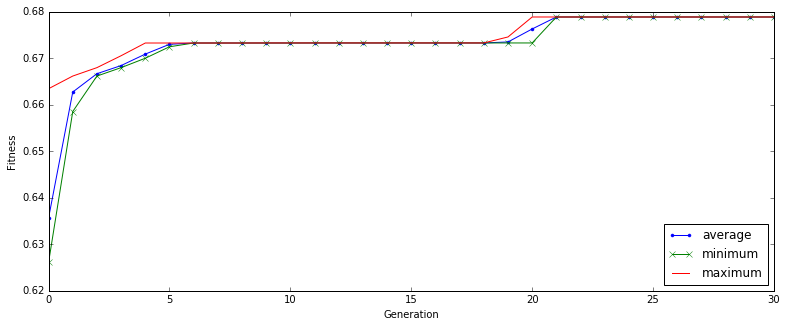

In [29]:
print_evolution(gen, avg, min_, max_)

### Best Combination

Genetic algorithm do not guarantee the optimum solution, but guarantee to find a best individual that is most fit for the fitness condition. 


In [39]:
df = pd.read_csv('../3-Output/population.csv', header=None, sep=';')
df.columns = ['Gene', 'Stats']
df = pd.concat((df, df["Stats"].str.extract("\((.*), (.*), '(.*)'\)" , expand=True)), axis=1)
del(df['Stats'])
df.columns = ['Gene', 'Train F1', 'Dev F1', 'Agl F1']
df = df.sort_values(['Dev F1'], ascending=False)

# top 3
df.set_index('Gene').head(3)

,Train F1,Dev F1,Agl F1
Gene,,,
"[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]",0.6842960012742658,0.6799153784606007,LogisticRegression
"[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]",0.6861432229835883,0.6794693829962256,LogisticRegression
"[1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]",0.6782392646784301,0.6789398523492036,LogisticRegression


In [40]:
# worst 3
df.set_index('Gene').tail(3)

,Train F1,Dev F1,Agl F1
Gene,,,
"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",0.6661252311002658,0.6264922352173088,SGDClassifier
"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.66752714956688752,0.62611456555462164,SGDClassifier
"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.6675271495668875,0.6261145655546216,SGDClassifier


In [41]:
def decode_gene(ind):
    """
    Decode a gene to a information that can be processed.
    """
    return [r.lexs[idx] for idx, present in enumerate(ind) if present]
decode_gene(eval(df.head(1)['Gene'].values[0]))

### LIWC

In [42]:
def read_original_files():
    """
    Read the original files 
    """
    # read the config file
    cfg = fh.read_config_file("all.yaml")

    # read the train file
    file_name = "../1-Input/trainingData-B.tsv"
    file_type = 'B'
    train_feat, labels, train_tweets = pipe.create_features(file_name, file_type, cfg)

    # read the dev file
    file_name = "../1-Input/devData-B.tsv"
    file_type = 'B'
    dev_feat, dev_labels, dev_tweets = pipe.create_features(file_name, file_type, cfg)

    # read the test file
    file_name = "../1-Input/testData-B.tsv"
    file_type = 'B'
    test_feat, gold, test_tweets = pipe.create_features(file_name, file_type, cfg)

    return train_feat, dev_feat, test_feat

def load_LIWC():
    """
    Load the LIWC from HD 
    """
    zero = {'ABBREVIATIONS': 0.0, 'ACHIEVEMENT': 0.0, 'AFFECTIVE_PROCESS': 0.0, 'ALLPCT': 0.0, 'ANGER': 0.0, 'ANXIETY': 0.0, 'APOSTRO': 0.0, 'ARTICLES': 0.0, 'ASSENTS': 0.0, 'BODY_STATES': 0.0, 'CAUSATION': 0.0, 'CERTAINTY': 0.0, 'COGNITIVE_PROCESS': 0.0, 'COLON': 0.0, 'COMMA': 0.0, 'COMMUNICATION': 0.0, 'DASH': 0.0, 'DEATH_AND_DYING': 0.0, 'DIC': 0.0, 'DISCREPANCY': 0.0, 'DOWN': 0.0, 'EATING': 0.0, 'EMOTICONS': 0.0, 'EXCLAM': 0.0, 'EXCLUSIVE': 0.0, 'FAMILY': 0.0, 'FEELING': 0.0, 'FILLERS': 0.0, 'FRIENDS': 0.0, 'FUTURE': 0.0, 'GROOMING': 0.0, 'HEARING': 0.0, 'HOME': 0.0, 'HUMANS': 0.0, 'I': 0.0, 'INCLUSIVE': 0.0, 'INHIBITION': 0.0, 'INSIGHT': 0.0, 'JOB_OR_WORK': 0.0, 'LEISURE_ACTIVITY': 0.0, 'METAPHYSICAL': 0.0, 'MONEY': 0.0, 'MOTION': 0.0, 'MUSIC': 0.0, 'NEGATIONS': 0.0, 'NEGATIVE_EMOTION': 0.0, 'NONFLUENCIES': 0.0, 'NUMBERS': 0.0, 'OCCUPATION': 0.0, 'OPTIMISM': 0.0, 'OTHER': 0.0, 'OTHERP': 0.0, 'PARENTH': 0.0, 'PAST': 0.0, 'PERIOD': 0.0, 'PHYSICAL_STATES': 0.0, 'POSITIVE_EMOTION': 0.0, 'POSITIVE_FEELING': 0.0, 'PREPOSITIONS': 0.0, 'PRESENT': 0.0, 'PRONOUN': 0.0, 'QMARK': 0.0, 'QMARKS': 0.0, 'QUOTE': 0.0, 'REFERENCE_PEOPLE': 0.0, 'RELIGION': 0.0, 'SADNESS': 0.0, 'SCHOOL': 0.0, 'SEEING': 0.0, 'SELF': 0.0, 'SEMIC': 0.0, 'SENSORY_PROCESS': 0.0, 'SEXUALITY': 0.0, 'SIXLTR': 0.0, 'SLEEPING': 0.0, 'SOCIAL_PROCESS': 0.0, 'SPACE': 0.0, 'SPORTS': 0.0, 'SWEAR_WORDS': 0.0, 'TENTATIVE': 0.0, 'TIME': 0.0, 'TV_OR_MOVIE': 0.0, 'UNIQUE': 0.0, 'UP': 0.0, 'WC': 0.0, 'WE': 0.0, 'WPS': 0.0, 'YOU': 0.0}

    train_liwc = fh.read_liwc('../2-Processed/allTrainingData.liwc.tsv')
    train_liwc1 = fh.read_liwc('../2-Processed/trainingData-B.liwc.tsv')
    dev_liwc = fh.read_liwc('../2-Processed/devData-B.liwc.tsv')
    test_liwc = fh.read_liwc('../2-Processed/testData-B.liwc.tsv')

    # as all the information comes out of orde from liwc, it needs to be put in order again.
    train_feat, dev_feat, test_feat = read_original_files()
    train_sent_liwc = [ train_liwc.get(int(tw.sid), train_liwc1.get(int(tw.sid), zero)) for tw in train_feat]
    dev_sent_liwc = [ dev_liwc[int(tw.sid)] for tw in dev_feat]
    test_sent_liwc = [ test_liwc[int(tw.sid)] for tw in test_feat]

    return train_sent_liwc, dev_sent_liwc, test_sent_liwc

# read LIWC features
train_liwc, dev_liwc, test_liwc = load_LIWC()


/Users/adrianow/Documents/Programs/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:840: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  "columns will be omitted.", UserWarning)


Read 9683 rows from ../1-Input/trainingData-B.tsv
Read 1653 rows from ../1-Input/devData-B.tsv
Read 3812 rows from ../1-Input/testData-B.tsv


In [56]:
full_train_liwc = train_liwc+dev_liwc

### Processing the final pipeline
After having the individuals and able to decode the gene, the final pipeline can be created. The Train and Development datasets will be merged to form a bigger training dataset where a model will be created and evaluated over the final test dataset

In [43]:
# read the information
OUTPUT_DIR = '../3-Output/'
MODEL_OUT_DIR = '../6-Models'
CREATE_TOKENS_FILES = True
PROCESS_DIR = '../2-Processed'

# read the config file
cfg = fh.read_config_file("all.yaml")

# read the train file
file_name = "../1-Input/trainingData-B.tsv"
file_type = 'B'
_, labels, train_tweets = pipe.create_features(file_name, file_type, cfg)

# read the dev file
file_name = "../1-Input/devData-B.tsv"
file_type = 'B'
_, dev_labels, dev_tweets = pipe.create_features(file_name, file_type, cfg)

# read the test file
file_name = "../1-Input/testData-B.tsv"
file_type = 'B'
_, gold, test_tweets = pipe.create_features(file_name, file_type, cfg)

Read 9683 rows from ../1-Input/trainingData-B.tsv
Read 1653 rows from ../1-Input/devData-B.tsv
Read 3812 rows from ../1-Input/testData-B.tsv


In [44]:
# random seed for all the operations
rnd_seed = 9000

# join datasets
train_final = train_tweets[:]
train_final.extend(dev_tweets)

# convert the list into and array that can be indexed
train_labels = np.concatenate((np.array(labels),np.array(dev_labels)))
gold = np.array(gold)

# create the cleaned the tweets
train_clean, test_clean, vect = pipe.create_count_vec(train_final, test_tweets, tokenizer=pipe.tokenize_clean_raw, stop_words=pipe.stop_words)
train_data, test_data, _ = pipe.auto_select_features(pipe.chi2, 5, train_clean, train_labels, test_clean, gold)

train shape: (9576, 19847)
dev shape: (3239, 19847)
Final shape (9576, 993) (3239, 993)


In [45]:
# using negated tokens
train_neg_tokens = [pipe.tokenize_negate_clean_raw(t) for t in train_final]
test_neg_tokens = [pipe.tokenize_negate_clean_raw(t) for t in test_tweets]

In [46]:
# not using negated tokens
train_tokens = [pipe.tokenize_clean_raw(t) for t in train_final]
test_tokens = [pipe.tokenize_clean_raw(t) for t in test_tweets]

In [47]:
def create_ind_features(ind, base_train, base_test, train_tokens, test_tokens):
    """
    Given an individual, create the features according to its genes
    Params:
        ind: individual generated in the genetic algorithm
    Returns:
        train and test data as a scipy sparse matrix
    """
    # load the lexicons according to the gens
    ind_lexs = decode_gene(ind)
    
    # for each of the lexicons, merge them
    final_train = base_train.copy()
    final_test = base_test.copy()

    for lex in ind_lexs:
        try:
            print('Joining the lex {}'.format(lex.prefix))
            train_sent = lex.process_lex(train_tokens, use_best_features=True)
            test_sent = lex.process_lex(test_tokens, use_best_features=True)
            final_train, final_test = pipe.join_lex_features(final_train, train_sent, 
                                                             final_test, test_sent, 
                                                             verbose=True, create_vec=True)
        except:
            # import pudb; pudb.set_trace()
            print 'error loading ind', ind
            print lex
    return final_train, final_test

In [48]:
def select_features(lex, train_feat, labels, test_feat):
    """
    Select the most important features according to a given criteria.
    """
    tmp_train_feat, tmp_test_feat, _, _ = pipe.create_lex_vec(train_feat, test_feat)
    tmp_train_feat, tmp_test_feat, selector = pipe.auto_select_features(pipe.mutual_info_classif, lex.selection_percent, 
                                                                       tmp_train_feat, labels, 
                                                                       tmp_test_feat, None)
    return tmp_train_feat, tmp_test_feat

def create_ind_features(ind, base_train, base_test, train_tokens, test_tokens):
    """
    Given an individual, create the features according to its genes
    Params:
        ind: individual generated in the genetic algorithm
    Returns:
        train and test data as a scipy sparse matrix
    """
     # remove the last locus as it refers to the LIWC
    LIWC_gene = ind[-1]
    tmp_ind = ind[:-1]
    
    # load the lexicons according to the gens
    ind_lexs = decode_gene(tmp_ind)
    
    # for each of the lexicons, merge them
    final_train = base_train.copy()
    final_test = base_test.copy()

    for lex in ind_lexs:
#         try:
        print('Joining the lex {}'.format(lex.prefix))
        # create the features from the datasets tokens
        if False:
            train_feat = lex.process_lex(train_neg_tokens, use_best_features=True)
            test_feat = lex.process_lex(test_neg_tokens, use_best_features=True)
        else:
            train_feat = lex.process_lex(train_tokens, use_best_features=True)
            test_feat = lex.process_lex(test_tokens, use_best_features=True)

#         print len(train_feat), len(test_feat)
#             print  test_feat[:3]

        # select the top percent features if this is the case. Set the flag to create vector at save if selection occurs
        if lex.selection_percent:
            train_feat, test_feat = select_features(lex, train_feat, train_labels, test_feat)
        else:
            train_feat, test_feat, _,_ = pipe.create_lex_vec(train_feat, test_feat)

#         print train_data.shape, test_data.shape
        final_train, final_test = pipe.join_lex_features(final_train, train_feat, 
                                                         final_test, test_feat, 
                                                         verbose=True, create_vec=False)
#         except:
#             u.print_exception()
#             print 'error loading ind', ind
#             print lex

        # check if should add LIWC
    if LIWC_gene:
        final_train, final_test = pipe.join_lex_features(final_train, full_train_liwc, 
                                                        final_test, test_liwc, 
                                                        verbose=False, create_vec=True)   
        print final_train.shape, final_test.shape
    return final_train, final_test

In [46]:
best_individual = eval(df.iloc[0]['Gene'])
X_train, X_test = create_ind_features(best_individual, 
                                      train_data, test_data, 
                                      train_neg_tokens, test_neg_tokens)

Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1000) (9576, 413) (9576, 1413)
test data, lex and final shape:  (3239, 1000) (3239, 413) (3239, 1413)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1413) (9576, 1) (9576, 1414)
test data, lex and final shape:  (3239, 1413) (3239, 1) (3239, 1414)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1414) (9576, 7) (9576, 1421)
test data, lex and final shape:  (3239, 1414) (3239, 7) (3239, 1421)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1421) (9576, 7) (9576, 1428)
test data, lex and final shape:  (3239, 1421) (3239, 7) (3239, 1428)
Joining the lex DAL
train data, lex and final shape:  (9576, 1428) (9576, 5) (9576, 1433)
test data, lex and final shape:  (3239, 1428) (3239, 5) (3239, 143

In [48]:
print X_train.shape, X_test.shape

(9576, 4761) (3239, 4761)


In [49]:
titles = [ lex.prefix for lex in r.lexs]
pd.DataFrame([eval(df.iloc[0]['Gene'])], columns=titles+['LIWC'])

,BING,SWN,MSOL,SSTREN,NRCHASH,SENT140,TSLEX,MPQA,ANEW,WNA,DAL,SENTN,EMOLX,SENTS,LEW,EMOSNET,LIWC
0,1,0,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0


In [160]:
titles = [ lex.prefix for lex in r.lexs]+['LIWC']
genes = [0 for _ in titles]
genes[0]= 1
genes[1]= 1
seq = range(len(genes))
columns = pd.MultiIndex.from_arrays([[1+v for v in seq], titles])
pd.DataFrame([genes], columns=columns)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
,BING,SWN,MSOL,SSTREN,NRCHASH,SENT140,TSLEX,MPQA,ANEW,WNA,DAL,SENTN,EMOLX,SENTS,LEW,EMOSNET,LIWC
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
columns = pd.MultiIndex.from_arrays

In [50]:
final_val_scores = pipe.run_multiple_class(X_train, train_labels, X_test, gold, 
                                           rnd_seed=rnd_seed, use_best_params=True,
                                           test_name='test')

In [51]:
pipe.pprint_results(final_val_scores, test_name='test')

In [61]:
final_scores = pipe.predict_test_multi_proc('LogisticRegression', X_train, train_labels, X_test, gold, test_name='test', rnd_seed=rnd)
pipe.pprint_results(final_scores, test_name='test')

### Comparing with the top 3

In [62]:
X_train_1, X_test_1 = create_ind_features(eval(df.iloc[1]['Gene']), 
                                      train_data, test_data, 
                                      train_neg_tokens, test_neg_tokens)
final_scores_1 = pipe.predict_test_multi_proc('LogisticRegression', X_train_1, train_labels, 
                                              X_test_1, gold, test_name='test')
pipe.pprint_results(final_scores_1, test_name='test')

Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1000) (9576, 413) (9576, 1413)
test data, lex and final shape:  (3239, 1000) (3239, 413) (3239, 1413)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1413) (9576, 7) (9576, 1420)
test data, lex and final shape:  (3239, 1413) (3239, 7) (3239, 1420)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1420) (9576, 7) (9576, 1427)
test data, lex and final shape:  (3239, 1420) (3239, 7) (3239, 1427)
Joining the lex DAL
train data, lex and final shape:  (9576, 1427) (9576, 5) (9576, 1432)
test data, lex and final shape:  (3239, 1427) (3239, 5) (3239, 1432)
Joining the lex SENTN
Final shape (9576, 3328) (3239, 3328)
train data, lex and final shape:  (9576, 1432) (9576, 3328) (9576, 4760)
test data, lex and final s

In [63]:
X_train_2, X_test_2 = create_ind_features(eval(df.iloc[2]['Gene']), 
                                      train_data, test_data, 
                                      train_neg_tokens, test_neg_tokens)
final_scores_2 = pipe.predict_test_multi_proc('LogisticRegression', X_train_2, train_labels, 
                                              X_test_2, gold, test_name='test')
pipe.pprint_results(final_scores_2, test_name='test')

Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1000) (9576, 1) (9576, 1001)
test data, lex and final shape:  (3239, 1000) (3239, 1) (3239, 1001)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1001) (9576, 7) (9576, 1008)
test data, lex and final shape:  (3239, 1001) (3239, 7) (3239, 1008)
Joining the lex MPQA
train data, lex and final shape:  (9576, 1008) (9576, 7) (9576, 1015)
test data, lex and final shape:  (3239, 1008) (3239, 7) (3239, 1015)
Joining the lex DAL
train data, lex and final shape:  (9576, 1015) (9576, 5) (9576, 1020)
test data, lex and final shape:  (3239, 1015) (3239, 5) (3239, 1020)
Joining the lex SENTN
Final shape (9576, 3328) (3239, 3328)
train data, lex and final shape:  (9576, 1020) (9576, 3328) (9576, 4348)
test data, lex and final shape:  (3239, 1020) (3239, 3328) (3239,

In [78]:
all_genes = [ 1 for i in range(0,17)]
X_train_3, X_test_3 = create_ind_features(all_genes, 
                                      train_data, test_data, 
                                      train_neg_tokens, test_neg_tokens)
final_scores_3 = pipe.predict_test_multi_proc('LogisticRegression', X_train_3, train_labels, 
                                              X_test_3, gold, test_name='test')
pipe.pprint_results(final_scores_3, test_name='test')

Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436)
test data, lex and final shape:  (3239, 1429) (3239, 7) (3239, 1

In [79]:
no_genes = [ 0 for i in range(0,17)]
X_train_4, X_test_4 = create_ind_features(no_genes, 
                                      train_data, test_data, 
                                      train_neg_tokens, test_neg_tokens)
final_scores_4 = pipe.predict_test_multi_proc('LogisticRegression', X_train_4, train_labels, 
                                              X_test_4, gold, test_name='test')
pipe.pprint_results(final_scores_4, test_name='test')

In [80]:
final = pd.concat([final_scores, final_scores_1, final_scores_2, final_scores_3, final_scores_4])
final.index = [df.iloc[0]['Gene'], df.iloc[1]['Gene'], df.iloc[2]['Gene'],'{}'.format(all_genes), '{}'.format(no_genes)]
pipe.pprint_results(final, test_name='test')

In [84]:
best_individual[-1] = 1
X_train_4, X_test_4 = create_ind_features(best_individual, 
                                      train_data, test_data, 
                                      train_neg_tokens, test_neg_tokens)
final_scores_4 = pipe.predict_test_multi_proc('LogisticRegression', X_train_4, train_labels, 
                                              X_test_4, gold, test_name='test')
pipe.pprint_results(final_scores_4, test_name='test')

Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1000) (9576, 413) (9576, 1413)
test data, lex and final shape:  (3239, 1000) (3239, 413) (3239, 1413)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1413) (9576, 1) (9576, 1414)
test data, lex and final shape:  (3239, 1413) (3239, 1) (3239, 1414)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1414) (9576, 7) (9576, 1421)
test data, lex and final shape:  (3239, 1414) (3239, 7) (3239, 1421)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1421) (9576, 7) (9576, 1428)
test data, lex and final shape:  (3239, 1421) (3239, 7) (3239, 1428)
Joining the lex DAL
train data, lex and final shape:  (9576, 1428) (9576, 5) (9576, 1433)
test data, lex and final shape:  (3239, 1428) (3239, 5) (3239, 143

### A direct insertion of features

In [101]:
results = []
no_genes = [ 0 for i in range(0,17)]
for i in range(17):
    no_genes[i] = 1
    print no_genes
    X_tr, X_tst = create_ind_features(no_genes, 
                                      train_data, test_data, 
                                      train_neg_tokens, test_neg_tokens)
    final_scores = pipe.predict_test_multi_proc(no_genes, X_tr, train_labels, 
                                              X_tst, gold, test_name='test')
    display(final_scores)
    results.append(final_scores)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.787828,0.621087,0.549774,0.721223,0.692401,0.000066,0.000372,0.000779,0.000112,0.000092


[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.78905,0.619783,0.54925,0.720373,0.690316,0.000141,0.000298,0.000439,0.000179,0.000232


[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.805381,0.627828,0.56376,0.716202,0.691897,0.000177,0.000435,0.000799,0.000073,0.000188


[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.804795,0.633586,0.570095,0.716678,0.697077,0.000255,0.000261,0.000244,0.000201,0.000293


[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.761525,0.648589,0.589229,0.726915,0.70795,0.000229,0.000162,0.000323,0.000138,0.0


[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436)
test data, l

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.727226,0.64984,0.592386,0.722353,0.707294,0.000073,0.000155,1.170278e-16,0.00023,0.00031


[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436)
test data, l

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.725639,0.660418,0.606848,0.73054,0.713988,0.000254,0.000243,0.00038,0.000448,0.000154


[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436)
test data, l

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.726999,0.656888,0.600447,0.727976,0.71333,0.000246,0.000549,0.000776,0.000329,0.000447


[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436)
test data, l

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.738376,0.656356,0.597822,0.727145,0.71489,0.000215,0.000387,0.000613,0.000287,0.000225


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436)
test data, l

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.739072,0.654891,0.592975,0.725005,0.716806,0.000156,0.000403,0.000624,0.00031,0.000351


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436)
test data, l

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.737809,0.657483,0.602355,0.73389,0.712611,0.000119,0.000278,0.000559,0.000117,0.00017


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436)
test data, l

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.749478,0.661429,0.608746,0.732023,0.714113,0.00014,0.000506,0.000635,0.000216,0.000413


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436)
test data, l

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.7522,0.662118,0.61117,0.732077,0.713067,0.000188,0.000276,0.000624,0.000277,0.000266


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436)
test data, l

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.751975,0.661694,0.609671,0.73275,0.713718,0.000121,0.000421,0.000932,0.000293,0.000144


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436)
test data, l

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.747186,0.662423,0.610114,0.731988,0.714733,0.000111,0.000435,0.000795,0.000127,0.000144


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436)
test data, l

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.748694,0.660263,0.60729,0.727309,0.713237,0.000135,0.000381,0.000904,0.000124,0.000258


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436)
test data, l

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.704146,0.655164,0.592907,0.735689,0.71742,0.000172,0.000155,0.000231,0.000118,0.000171


In [111]:
no_genes = [ 0 for i in range(0,17)]
names = []
for i in range(17):
    no_genes[i] = 1
    names.append('{}'.format(no_genes))

tmp = pd.concat(results)
tmp.index = names
pipe.pprint_results(tmp, test_name='test')

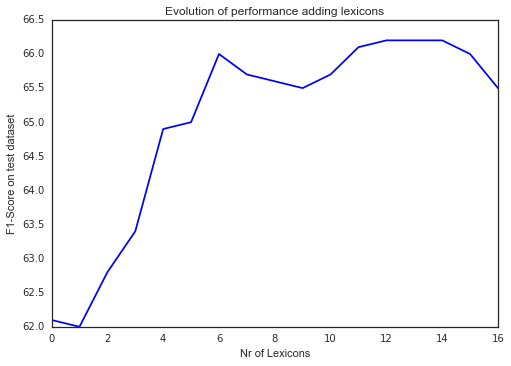

In [22]:
plt.style.use(u'seaborn-white')
y = [62.1, 62.0, 62.8, 63.4, 64.9, 65.0, 66.0, 65.7, 65.6, 65.5, 65.7, 66.1, 66.2, 66.2, 66.2, 66.0, 65.5]
x = range(len(y))
plt.plot(x,y, label="", color="b")
plt.title(
        'Evolution of performance adding lexicons')
plt.xlabel('Nr of Lexicons')
plt.ylabel('F1-Score on test dataset')
plt.show()


## Using the best only
What if we would use the best combination ourselves

In [49]:
titles = [ lex.prefix for lex in r.lexs]
best_lexicon = [1,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,1]
pd.DataFrame([best_lexicon], columns=titles+['LIWC'])

,BING,SWN,MSOL,SSTREN,NRCHASH,SENT140,TSLEX,MPQA,ANEW,WNA,DAL,SENTN,EMOLX,SENTS,LEW,EMOSNET,LIWC
0,1,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,1


In [61]:
# using the best sequence and LIWC
results = []
best_lexicons = [[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                 [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
                 [1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
                 [1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0],
                 [1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1],
                 [1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1],
                 [1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1],
                 [1,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,1],
                 [1,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0,1],
                 [1,0,0,1,1,1,1,0,1,1,0,1,1,0,0,0,1],
                 [1,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,1],
                 [1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,0,1],
                 [1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,1],
                 [1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1],
                 [1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1],
                 [1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
                ]
for i in range(len(best_lexicons)):
    new_gene = best_lexicons[i]
    print('testing gene: {}'.format(new_gene))
    X_train_best, X_test_best = create_ind_features(new_gene, 
                                          train_data, test_data, 
                                          train_neg_tokens, test_neg_tokens)
    final_scores_best = pipe.predict_test_multi_proc('LogisticRegression', X_train_best, train_labels, 
                                                  X_test_best, gold, test_name='test')
    
    display(final_scores_best)
    results.append(final_scores_best)

testing gene: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.787828,0.621087,0.549774,0.721223,0.692401,0.000066,0.000372,0.000779,0.000112,0.000092


testing gene: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1000) (9576, 7) (9576, 1007)
test data, lex and final shape:  (3239, 1000) (3239, 7) (3239, 1007)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.754252,0.648557,0.589076,0.727171,0.708038,0.000227,0.000089,0.000177,0.000133,0.0


testing gene: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1000) (9576, 7) (9576, 1007)
test data, lex and final shape:  (3239, 1000) (3239, 7) (3239, 1007)
Joining the lex EMOLX
train data, lex and final shape:  (9576, 1007) (9576, 50) (9576, 1057)
test data, lex and final shape:  (3239, 1007) (3239, 50) (3239, 1057)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.74919,0.657575,0.602147,0.729591,0.713003,0.0001,0.000456,0.000569,0.000222,0.000374


testing gene: [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1000) (9576, 7) (9576, 1007)
test data, lex and final shape:  (3239, 1000) (3239, 7) (3239, 1007)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1007) (9576, 7) (9576, 1014)
test data, lex and final shape:  (3239, 1007) (3239, 7) (3239, 1014)
Joining the lex EMOLX
train data, lex and final shape:  (9576, 1014) (9576, 50) (9576, 1064)
test data, lex and final shape:  (3239, 1014) (3239, 50) (3239, 1064)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.716054,0.654273,0.596057,0.724221,0.712489,0.00012,0.000321,0.000288,0.000078,0.00037


testing gene: [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1000) (9576, 7) (9576, 1007)
test data, lex and final shape:  (3239, 1000) (3239, 7) (3239, 1007)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1007) (9576, 7) (9576, 1014)
test data, lex and final shape:  (3239, 1007) (3239, 7) (3239, 1014)
Joining the lex EMOLX
train data, lex and final shape:  (9576, 1014) (9576, 50) (9576, 1064)
test data, lex and final shape:  (3239, 1014) (3239, 50) (3239, 1064)
(9576, 1152) (3239, 1152)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.668649,0.649746,0.586891,0.733476,0.712601,0.000255,0.000304,0.00047,0.000306,0.00041


testing gene: [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1000) (9576, 7) (9576, 1007)
test data, lex and final shape:  (3239, 1000) (3239, 7) (3239, 1007)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1007) (9576, 7) (9576, 1014)
test data, lex and final shape:  (3239, 1007) (3239, 7) (3239, 1014)
Joining the lex SENTN
Final shape (9576, 3328) (3239, 3328)
train data, lex and final shape:  (9576, 1014) (9576, 3328) (9576, 4342)
test data, lex and final shape:  (3239, 1014) (3239, 3328) (3239, 4342)
Joining the lex EMOLX
train data, lex and final shape:  (9576, 4342) (9576, 50) (9576, 4392)
test data, lex and final shape:  (3239, 4342) (3239, 50) (3239, 4392)
(9576, 4480) (3239, 4480)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.67943,0.654135,0.596523,0.73494,0.711747,0.000039,0.000552,0.000775,1.170278e-16,0.000348


testing gene: [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1000) (9576, 1) (9576, 1001)
test data, lex and final shape:  (3239, 1000) (3239, 1) (3239, 1001)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1001) (9576, 7) (9576, 1008)
test data, lex and final shape:  (3239, 1001) (3239, 7) (3239, 1008)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1008) (9576, 7) (9576, 1015)
test data, lex and final shape:  (3239, 1008) (3239, 7) (3239, 1015)
Joining the lex SENTN
Final shape (9576, 3328) (3239, 3328)
train data, lex and final shape:  (9576, 1015) (9576, 3328) (9576, 4343)
test data, lex and final shape:  (3239, 1015) (3239, 3328) (3239, 4343)
Joining the lex EMOLX
train data, lex and final shape:  (9576, 4343) (9576, 50) (9576

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.682051,0.656203,0.597225,0.736529,0.715182,0.000126,0.000264,0.000529,0.000234,1.170278e-16


testing gene: [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1000) (9576, 1) (9576, 1001)
test data, lex and final shape:  (3239, 1000) (3239, 1) (3239, 1001)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1001) (9576, 7) (9576, 1008)
test data, lex and final shape:  (3239, 1001) (3239, 7) (3239, 1008)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1008) (9576, 7) (9576, 1015)
test data, lex and final shape:  (3239, 1008) (3239, 7) (3239, 1015)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1015) (9576, 7) (9576, 1022)
test data, lex and final shape:  (3239, 1015) (3239, 7) (3239, 1022)
Joining the lex SENTN
Final shape (9576, 3328) (3239, 3328)
train data, lex and final shape:  (9576, 1022) (9576, 3328) (9576, 

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.682229,0.658258,0.597644,0.734074,0.718873,0.000127,0.000466,0.000683,0.000245,0.000375


testing gene: [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1000) (9576, 1) (9576, 1001)
test data, lex and final shape:  (3239, 1000) (3239, 1) (3239, 1001)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1001) (9576, 7) (9576, 1008)
test data, lex and final shape:  (3239, 1001) (3239, 7) (3239, 1008)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1008) (9576, 7) (9576, 1015)
test data, lex and final shape:  (3239, 1008) (3239, 7) (3239, 1015)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1015) (9576, 7) (9576, 1022)
test data, lex and final shape:  (3239, 1015) (3239, 7) (3239, 1022)
Joining the lex ANEW
Final shape (9576, 247) (3239, 247)
train data, lex and final shape:  (9576, 1022) (9576, 247) (9576, 1269

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.692724,0.650412,0.588536,0.731348,0.712288,0.000108,0.000251,0.000408,1.170278e-16,0.000094


testing gene: [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1000) (9576, 1) (9576, 1001)
test data, lex and final shape:  (3239, 1000) (3239, 1) (3239, 1001)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1001) (9576, 7) (9576, 1008)
test data, lex and final shape:  (3239, 1001) (3239, 7) (3239, 1008)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1008) (9576, 7) (9576, 1015)
test data, lex and final shape:  (3239, 1008) (3239, 7) (3239, 1015)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1015) (9576, 7) (9576, 1022)
test data, lex and final shape:  (3239, 1015) (3239, 7) (3239, 1022)
Joining the lex ANEW
Final shape (9576, 247) (3239, 247)
train data, lex and final shape:  (9576, 1022) (9576, 247) (9576, 1269

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.693751,0.651055,0.588659,0.731641,0.71345,0.000115,0.000356,0.000616,0.000226,0.000358


testing gene: [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1000) (9576, 1) (9576, 1001)
test data, lex and final shape:  (3239, 1000) (3239, 1) (3239, 1001)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1001) (9576, 7) (9576, 1008)
test data, lex and final shape:  (3239, 1001) (3239, 7) (3239, 1008)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1008) (9576, 7) (9576, 1015)
test data, lex and final shape:  (3239, 1008) (3239, 7) (3239, 1015)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1015) (9576, 7) (9576, 1022)
test data, lex and final shape:  (3239, 1015) (3239, 7) (3239, 1022)
Joining the lex MPQA
train data, lex and final shape:  (9576, 1022) (9576, 7) (9576, 1029)
test data, lex and final shape:  (32

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.695514,0.653488,0.592695,0.733185,0.71428,0.000159,0.000554,0.000734,0.000395,0.000481


testing gene: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1008) (9576, 1) (9576, 1009)
test data, lex and final shape:  (3239, 1008) (3239, 1) (3239, 1009)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1009) (9576, 7) (9576, 1016)
test data, lex and final shape:  (3239, 1009) (3239, 7) (3239, 1016)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1016) (9576, 7) (9576, 1023)
test data, lex and final shape:  (3239, 1016) (3239, 7) (3239, 1023)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1023) (9576, 7) (9576, 1030)
test data, lex and final shape:  (323

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.696908,0.650394,0.588558,0.731067,0.71223,0.00018,0.000359,0.000681,0.000164,0.000228


testing gene: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1008) (9576, 1) (9576, 1009)
test data, lex and final shape:  (3239, 1008) (3239, 1) (3239, 1009)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1009) (9576, 7) (9576, 1016)
test data, lex and final shape:  (3239, 1009) (3239, 7) (3239, 1016)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1016) (9576, 7) (9576, 1023)
test data, lex and final shape:  (3239, 1016) (3239, 7) (3239, 1023)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1023) (9576, 7) (9576, 1030)
test data, lex and final shape:  (323

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.696797,0.649333,0.589478,0.7322,0.709187,0.000111,0.000231,0.000171,0.000164,0.000381


testing gene: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1008) (9576, 1) (9576, 1009)
test data, lex and final shape:  (3239, 1008) (3239, 1) (3239, 1009)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1009) (9576, 7) (9576, 1016)
test data, lex and final shape:  (3239, 1009) (3239, 7) (3239, 1016)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1016) (9576, 7) (9576, 1023)
test data, lex and final shape:  (3239, 1016) (3239, 7) (3239, 1023)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1023) (9576, 7) (9576, 1030)
test data, lex and final shape:  (323

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.697853,0.650446,0.593205,0.731251,0.707687,0.000114,0.00017,0.0,0.000242,0.00034


testing gene: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1008) (9576, 1) (9576, 1009)
test data, lex and final shape:  (3239, 1008) (3239, 1) (3239, 1009)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1009) (9576, 7) (9576, 1016)
test data, lex and final shape:  (3239, 1009) (3239, 7) (3239, 1016)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1016) (9576, 7) (9576, 1023)
test data, lex and final shape:  (3239, 1016) (3239, 7) (3239, 1023)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1023) (9576, 7) (9576, 1030)
test data, lex and final shape:  (323

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.698339,0.653532,0.595729,0.731942,0.711336,0.000187,0.000086,0.000173,0.000077,1.170278e-16


testing gene: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1008) (9576, 1) (9576, 1009)
test data, lex and final shape:  (3239, 1008) (3239, 1) (3239, 1009)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1009) (9576, 7) (9576, 1016)
test data, lex and final shape:  (3239, 1009) (3239, 7) (3239, 1016)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1016) (9576, 7) (9576, 1023)
test data, lex and final shape:  (3239, 1016) (3239, 7) (3239, 1023)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1023) (9576, 7) (9576, 1030)
test data, lex and final shape:  (323

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.698395,0.652426,0.593515,0.731448,0.711336,0.000191,0.000115,0.000229,0.000102,1.170278e-16


testing gene: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.704146,0.655164,0.592907,0.735689,0.71742,0.000172,0.000155,0.000231,0.000118,0.000171


In [137]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

# Using LIWC
tmp = pd.concat(results)
tmp.index = [ "{}".format(bl) for bl in  best_lexicons]
tmp = tmp.reset_index().rename(columns={'index':'Individual'})
tmp[['Individual', 'train score', 'test score']].style.apply(highlight_max, subset=['test score'])

In [117]:
# using the best lexicons sequence, no LIWC
results = []
best_lexicons = [[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                 [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
                 [1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
                 [1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0],
#                  [1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1],
                 [1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0],
                 [1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0],
                 [1,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0],
                 [1,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0],
                 [1,0,0,1,1,1,1,0,1,1,0,1,1,0,0,0,0],
                 [1,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0],
                 [1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0],
                 [1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0],
                 [1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,0],
                 [1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0],
                 [1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
                 [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0]
                ]
for i in range(len(best_lexicons)):
    new_gene = best_lexicons[i]
    print('testing gene: {}'.format(new_gene))
    X_train_best, X_test_best = create_ind_features(new_gene, 
                                          train_data, test_data, 
                                          train_neg_tokens, test_neg_tokens)
    final_scores_best = pipe.predict_test_multi_proc('LogisticRegression', X_train_best, train_labels, 
                                                  X_test_best, gold, test_name='test')
    
    display(final_scores_best)
    results.append(final_scores_best)

testing gene: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.787828,0.621087,0.549774,0.721223,0.692401,0.000066,0.000372,0.000779,0.000112,0.000092


testing gene: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1000) (9576, 7) (9576, 1007)
test data, lex and final shape:  (3239, 1000) (3239, 7) (3239, 1007)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.754252,0.648557,0.589076,0.727171,0.708038,0.000227,0.000089,0.000177,0.000133,0.0


testing gene: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1000) (9576, 7) (9576, 1007)
test data, lex and final shape:  (3239, 1000) (3239, 7) (3239, 1007)
Joining the lex EMOLX
train data, lex and final shape:  (9576, 1007) (9576, 50) (9576, 1057)
test data, lex and final shape:  (3239, 1007) (3239, 50) (3239, 1057)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.74919,0.657575,0.602147,0.729591,0.713003,0.0001,0.000456,0.000569,0.000222,0.000374


testing gene: [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1000) (9576, 7) (9576, 1007)
test data, lex and final shape:  (3239, 1000) (3239, 7) (3239, 1007)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1007) (9576, 7) (9576, 1014)
test data, lex and final shape:  (3239, 1007) (3239, 7) (3239, 1014)
Joining the lex EMOLX
train data, lex and final shape:  (9576, 1014) (9576, 50) (9576, 1064)
test data, lex and final shape:  (3239, 1014) (3239, 50) (3239, 1064)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.716054,0.654273,0.596057,0.724221,0.712489,0.00012,0.000321,0.000288,0.000078,0.00037


testing gene: [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1000) (9576, 7) (9576, 1007)
test data, lex and final shape:  (3239, 1000) (3239, 7) (3239, 1007)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1007) (9576, 7) (9576, 1014)
test data, lex and final shape:  (3239, 1007) (3239, 7) (3239, 1014)
Joining the lex EMOLX
train data, lex and final shape:  (9576, 1014) (9576, 50) (9576, 1064)
test data, lex and final shape:  (3239, 1014) (3239, 50) (3239, 1064)
(9576, 1152) (3239, 1152)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.668649,0.649746,0.586891,0.733476,0.712601,0.000255,0.000304,0.00047,0.000306,0.00041


testing gene: [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1000) (9576, 7) (9576, 1007)
test data, lex and final shape:  (3239, 1000) (3239, 7) (3239, 1007)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1007) (9576, 7) (9576, 1014)
test data, lex and final shape:  (3239, 1007) (3239, 7) (3239, 1014)
Joining the lex SENTN
Final shape (9576, 3328) (3239, 3328)
train data, lex and final shape:  (9576, 1014) (9576, 3328) (9576, 4342)
test data, lex and final shape:  (3239, 1014) (3239, 3328) (3239, 4342)
Joining the lex EMOLX
train data, lex and final shape:  (9576, 4342) (9576, 50) (9576, 4392)
test data, lex and final shape:  (3239, 4342) (3239, 50) (3239, 4392)
(9576, 4480) (3239, 4480)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.67943,0.654135,0.596523,0.73494,0.711747,0.000039,0.000552,0.000775,1.170278e-16,0.000348


testing gene: [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1000) (9576, 1) (9576, 1001)
test data, lex and final shape:  (3239, 1000) (3239, 1) (3239, 1001)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1001) (9576, 7) (9576, 1008)
test data, lex and final shape:  (3239, 1001) (3239, 7) (3239, 1008)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1008) (9576, 7) (9576, 1015)
test data, lex and final shape:  (3239, 1008) (3239, 7) (3239, 1015)
Joining the lex SENTN
Final shape (9576, 3328) (3239, 3328)
train data, lex and final shape:  (9576, 1015) (9576, 3328) (9576, 4343)
test data, lex and final shape:  (3239, 1015) (3239, 3328) (3239, 4343)
Joining the lex EMOLX
train data, lex and final shape:  (9576, 4343) (9576, 50) (9576

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.682051,0.656203,0.597225,0.736529,0.715182,0.000126,0.000264,0.000529,0.000234,1.170278e-16


testing gene: [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1000) (9576, 1) (9576, 1001)
test data, lex and final shape:  (3239, 1000) (3239, 1) (3239, 1001)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1001) (9576, 7) (9576, 1008)
test data, lex and final shape:  (3239, 1001) (3239, 7) (3239, 1008)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1008) (9576, 7) (9576, 1015)
test data, lex and final shape:  (3239, 1008) (3239, 7) (3239, 1015)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1015) (9576, 7) (9576, 1022)
test data, lex and final shape:  (3239, 1015) (3239, 7) (3239, 1022)
Joining the lex SENTN
Final shape (9576, 3328) (3239, 3328)
train data, lex and final shape:  (9576, 1022) (9576, 3328) (9576, 

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.682229,0.658258,0.597644,0.734074,0.718873,0.000127,0.000466,0.000683,0.000245,0.000375


testing gene: [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1000) (9576, 1) (9576, 1001)
test data, lex and final shape:  (3239, 1000) (3239, 1) (3239, 1001)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1001) (9576, 7) (9576, 1008)
test data, lex and final shape:  (3239, 1001) (3239, 7) (3239, 1008)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1008) (9576, 7) (9576, 1015)
test data, lex and final shape:  (3239, 1008) (3239, 7) (3239, 1015)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1015) (9576, 7) (9576, 1022)
test data, lex and final shape:  (3239, 1015) (3239, 7) (3239, 1022)
Joining the lex ANEW
Final shape (9576, 247) (3239, 247)
train data, lex and final shape:  (9576, 1022) (9576, 247) (9576, 1269

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.692724,0.650412,0.588536,0.731348,0.712288,0.000108,0.000251,0.000408,1.170278e-16,0.000094


testing gene: [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1000) (9576, 1) (9576, 1001)
test data, lex and final shape:  (3239, 1000) (3239, 1) (3239, 1001)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1001) (9576, 7) (9576, 1008)
test data, lex and final shape:  (3239, 1001) (3239, 7) (3239, 1008)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1008) (9576, 7) (9576, 1015)
test data, lex and final shape:  (3239, 1008) (3239, 7) (3239, 1015)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1015) (9576, 7) (9576, 1022)
test data, lex and final shape:  (3239, 1015) (3239, 7) (3239, 1022)
Joining the lex ANEW
Final shape (9576, 247) (3239, 247)
train data, lex and final shape:  (9576, 1022) (9576, 247) (9576, 1269

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.693751,0.651055,0.588659,0.731641,0.71345,0.000115,0.000356,0.000616,0.000226,0.000358


testing gene: [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1000) (9576, 1) (9576, 1001)
test data, lex and final shape:  (3239, 1000) (3239, 1) (3239, 1001)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1001) (9576, 7) (9576, 1008)
test data, lex and final shape:  (3239, 1001) (3239, 7) (3239, 1008)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1008) (9576, 7) (9576, 1015)
test data, lex and final shape:  (3239, 1008) (3239, 7) (3239, 1015)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1015) (9576, 7) (9576, 1022)
test data, lex and final shape:  (3239, 1015) (3239, 7) (3239, 1022)
Joining the lex MPQA
train data, lex and final shape:  (9576, 1022) (9576, 7) (9576, 1029)
test data, lex and final shape:  (32

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.695514,0.653488,0.592695,0.733185,0.71428,0.000159,0.000554,0.000734,0.000395,0.000481


testing gene: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1008) (9576, 1) (9576, 1009)
test data, lex and final shape:  (3239, 1008) (3239, 1) (3239, 1009)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1009) (9576, 7) (9576, 1016)
test data, lex and final shape:  (3239, 1009) (3239, 7) (3239, 1016)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1016) (9576, 7) (9576, 1023)
test data, lex and final shape:  (3239, 1016) (3239, 7) (3239, 1023)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1023) (9576, 7) (9576, 1030)
test data, lex and final shape:  (323

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.696908,0.650394,0.588558,0.731067,0.71223,0.00018,0.000359,0.000681,0.000164,0.000228


testing gene: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1008) (9576, 1) (9576, 1009)
test data, lex and final shape:  (3239, 1008) (3239, 1) (3239, 1009)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1009) (9576, 7) (9576, 1016)
test data, lex and final shape:  (3239, 1009) (3239, 7) (3239, 1016)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1016) (9576, 7) (9576, 1023)
test data, lex and final shape:  (3239, 1016) (3239, 7) (3239, 1023)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1023) (9576, 7) (9576, 1030)
test data, lex and final shape:  (323

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.696797,0.649333,0.589478,0.7322,0.709187,0.000111,0.000231,0.000171,0.000164,0.000381


testing gene: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1008) (9576, 1) (9576, 1009)
test data, lex and final shape:  (3239, 1008) (3239, 1) (3239, 1009)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1009) (9576, 7) (9576, 1016)
test data, lex and final shape:  (3239, 1009) (3239, 7) (3239, 1016)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1016) (9576, 7) (9576, 1023)
test data, lex and final shape:  (3239, 1016) (3239, 7) (3239, 1023)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1023) (9576, 7) (9576, 1030)
test data, lex and final shape:  (323

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.697853,0.650446,0.593205,0.731251,0.707687,0.000114,0.00017,0.0,0.000242,0.00034


testing gene: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1008) (9576, 1) (9576, 1009)
test data, lex and final shape:  (3239, 1008) (3239, 1) (3239, 1009)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1009) (9576, 7) (9576, 1016)
test data, lex and final shape:  (3239, 1009) (3239, 7) (3239, 1016)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1016) (9576, 7) (9576, 1023)
test data, lex and final shape:  (3239, 1016) (3239, 7) (3239, 1023)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1023) (9576, 7) (9576, 1030)
test data, lex and final shape:  (323

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.698339,0.653532,0.595729,0.731942,0.711336,0.000187,0.000086,0.000173,0.000077,1.170278e-16


testing gene: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1008) (9576, 1) (9576, 1009)
test data, lex and final shape:  (3239, 1008) (3239, 1) (3239, 1009)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1009) (9576, 7) (9576, 1016)
test data, lex and final shape:  (3239, 1009) (3239, 7) (3239, 1016)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1016) (9576, 7) (9576, 1023)
test data, lex and final shape:  (3239, 1016) (3239, 7) (3239, 1023)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1023) (9576, 7) (9576, 1030)
test data, lex and final shape:  (323

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.698395,0.652426,0.593515,0.731448,0.711336,0.000191,0.000115,0.000229,0.000102,1.170278e-16


testing gene: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex SENT140
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.704146,0.655164,0.592907,0.735689,0.71742,0.000172,0.000155,0.000231,0.000118,0.000171


In [115]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]
    
# Not using LIWC
tmp = pd.concat(results)
tmp.index = [ "{}".format(bl) for bl in  best_lexicons]
tmp[['train score', 'test score']].style.apply(highlight_max, subset=['test score'])

In [87]:
# making the best one
results = []
best_lexicons = [[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                 [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
                 [1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
#                  [1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0],
#                  [1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1],
                 [1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0],
                 [1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0],
                 [1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0],
                 [1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0],
#                  [1,0,0,1,1,0,1,0,1,1,0,1,1,0,0,0,1],
#                  [1,0,0,1,1,0,1,1,1,1,0,1,1,0,0,0,1],
                 [1,1,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0],
#                  [1,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1],
#                  [1,1,0,1,1,0,1,0,1,0,0,1,1,0,1,1,1],
                 [1,1,0,1,1,0,1,0,1,0,1,1,1,0,0,0,0],
#                  [1,1,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1],
                 [1,1,1,1,1,0,1,0,1,0,1,1,1,0,0,0,0]
                ]
for i in range(len(best_lexicons)):
    new_gene = best_lexicons[i]
    print('testing gene: {}'.format(new_gene))
    X_train_best, X_test_best = create_ind_features(new_gene, 
                                          train_data, test_data, 
                                          train_neg_tokens, test_neg_tokens)
    final_scores_best = pipe.predict_test_multi_proc('LogisticRegression', X_train_best, train_labels, 
                                                  X_test_best, gold, test_name='test')
    
    display(final_scores_best)
    results.append(final_scores_best)

testing gene: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.787828,0.621087,0.549774,0.721223,0.692401,0.000066,0.000372,0.000779,0.000112,0.000092


testing gene: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1000) (9576, 7) (9576, 1007)
test data, lex and final shape:  (3239, 1000) (3239, 7) (3239, 1007)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.754252,0.648557,0.589076,0.727171,0.708038,0.000227,0.000089,0.000177,0.000133,0.0


testing gene: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1000) (9576, 7) (9576, 1007)
test data, lex and final shape:  (3239, 1000) (3239, 7) (3239, 1007)
Joining the lex EMOLX
train data, lex and final shape:  (9576, 1007) (9576, 50) (9576, 1057)
test data, lex and final shape:  (3239, 1007) (3239, 50) (3239, 1057)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.74919,0.657575,0.602147,0.729591,0.713003,0.0001,0.000456,0.000569,0.000222,0.000374


testing gene: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1000) (9576, 7) (9576, 1007)
test data, lex and final shape:  (3239, 1000) (3239, 7) (3239, 1007)
Joining the lex SENTN
Final shape (9576, 3328) (3239, 3328)
train data, lex and final shape:  (9576, 1007) (9576, 3328) (9576, 4335)
test data, lex and final shape:  (3239, 1007) (3239, 3328) (3239, 4335)
Joining the lex EMOLX
train data, lex and final shape:  (9576, 4335) (9576, 50) (9576, 4385)
test data, lex and final shape:  (3239, 4335) (3239, 50) (3239, 4385)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.766937,0.663101,0.60758,0.73182,0.718621,0.000086,0.000177,0.000185,1.170278e-16,0.000169


testing gene: [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1000) (9576, 1) (9576, 1001)
test data, lex and final shape:  (3239, 1000) (3239, 1) (3239, 1001)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1001) (9576, 7) (9576, 1008)
test data, lex and final shape:  (3239, 1001) (3239, 7) (3239, 1008)
Joining the lex SENTN
Final shape (9576, 3328) (3239, 3328)
train data, lex and final shape:  (9576, 1008) (9576, 3328) (9576, 4336)
test data, lex and final shape:  (3239, 1008) (3239, 3328) (3239, 4336)
Joining the lex EMOLX
train data, lex and final shape:  (9576, 4336) (9576, 50) (9576, 4386)
test data, lex and final shape:  (3239, 4336) (3239, 50) (3239, 4386)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.768468,0.664536,0.609461,0.732172,0.71961,0.000197,0.00007,0.000285,1.170278e-16,0.000145


testing gene: [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1000) (9576, 1) (9576, 1001)
test data, lex and final shape:  (3239, 1000) (3239, 1) (3239, 1001)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1001) (9576, 7) (9576, 1008)
test data, lex and final shape:  (3239, 1001) (3239, 7) (3239, 1008)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1008) (9576, 7) (9576, 1015)
test data, lex and final shape:  (3239, 1008) (3239, 7) (3239, 1015)
Joining the lex SENTN
Final shape (9576, 3328) (3239, 3328)
train data, lex and final shape:  (9576, 1015) (9576, 3328) (9576, 4343)
test data, lex and final shape:  (3239, 1015) (3239, 3328) (3239, 4343)
Joining the lex EMOLX
train data, lex and final shape:  (9576, 4343) (9576, 50) (9576

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.763078,0.663366,0.606632,0.733537,0.7201,0.000139,0.00031,0.000619,0.000256,1.170278e-16


testing gene: [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1000) (9576, 1) (9576, 1001)
test data, lex and final shape:  (3239, 1000) (3239, 1) (3239, 1001)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1001) (9576, 7) (9576, 1008)
test data, lex and final shape:  (3239, 1001) (3239, 7) (3239, 1008)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1008) (9576, 7) (9576, 1015)
test data, lex and final shape:  (3239, 1008) (3239, 7) (3239, 1015)
Joining the lex ANEW
Final shape (9576, 247) (3239, 247)
train data, lex and final shape:  (9576, 1015) (9576, 247) (9576, 1262)
test data, lex and final shape:  (3239, 1015) (3239, 247) (3239, 1262)
Joining the lex SENTN
Final shape (9576, 3328) (3239, 3328)
train data, lex and final shap

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.750875,0.651043,0.588066,0.725197,0.71402,0.000066,0.000096,0.000178,0.000178,0.000093


testing gene: [1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1008) (9576, 1) (9576, 1009)
test data, lex and final shape:  (3239, 1008) (3239, 1) (3239, 1009)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1009) (9576, 7) (9576, 1016)
test data, lex and final shape:  (3239, 1009) (3239, 7) (3239, 1016)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1016) (9576, 7) (9576, 1023)
test data, lex and final shape:  (3239, 1016) (3239, 7) (3239, 1023)
Joining the lex ANEW
Final shape (9576, 247) (3239, 247)
train data, lex and final shape:  (9576, 1023) (9576, 247) (9576, 1270)
te

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.752401,0.648799,0.587039,0.723776,0.710559,0.000159,0.000249,0.000429,0.000239,0.000252


testing gene: [1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1008) (9576, 1) (9576, 1009)
test data, lex and final shape:  (3239, 1008) (3239, 1) (3239, 1009)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1009) (9576, 7) (9576, 1016)
test data, lex and final shape:  (3239, 1009) (3239, 7) (3239, 1016)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1016) (9576, 7) (9576, 1023)
test data, lex and final shape:  (3239, 1016) (3239, 7) (3239, 1023)
Joining the lex ANEW
Final shape (9576, 247) (3239, 247)
train data, lex and final shape:  (9576, 1023) (9576, 247) (9576, 1270)
te

,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.754231,0.652366,0.596148,0.727548,0.708583,0.00014,0.000296,0.000434,0.000167,0.000282


testing gene: [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]
Joining the lex BING
train data, lex and final shape:  (9576, 993) (9576, 7) (9576, 1000)
test data, lex and final shape:  (3239, 993) (3239, 7) (3239, 1000)
Joining the lex SWN
train data, lex and final shape:  (9576, 1000) (9576, 8) (9576, 1008)
test data, lex and final shape:  (3239, 1000) (3239, 8) (3239, 1008)
Joining the lex MSOL
Final shape (9576, 413) (3239, 413)
train data, lex and final shape:  (9576, 1008) (9576, 413) (9576, 1421)
test data, lex and final shape:  (3239, 1008) (3239, 413) (3239, 1421)
Joining the lex SSTREN
train data, lex and final shape:  (9576, 1421) (9576, 1) (9576, 1422)
test data, lex and final shape:  (3239, 1421) (3239, 1) (3239, 1422)
Joining the lex NRCHASH
train data, lex and final shape:  (9576, 1422) (9576, 7) (9576, 1429)
test data, lex and final shape:  (3239, 1422) (3239, 7) (3239, 1429)
Joining the lex TSLEX
train data, lex and final shape:  (9576, 1429) (9576, 7) (9576, 1436)


,train score,test score,f1_test_neg,f1_test_neu,f1_test_pos,train std,test std,f1_test_neg std,f1_test_neu std,f1_test_pos std
LogisticRegression,0.761567,0.664588,0.613307,0.733687,0.71587,0.000221,0.000234,0.000417,0.000101,0.000177


In [90]:
tmp = pd.concat(results)
tmp.index = [ "{}".format(bl) for bl in  best_lexicons]
tmp[['train score', 'test score']]

,train score,test score
"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.787828,0.621087
"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.754252,0.648557
"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",0.749190,0.657575
"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]",0.766937,0.663101
"[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]",0.768468,0.664536
"[1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]",0.763078,0.663366
"[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]",0.750875,0.651043
"[1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]",0.752401,0.648799
"[1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]",0.754231,0.652366
"[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]",0.761567,0.664588


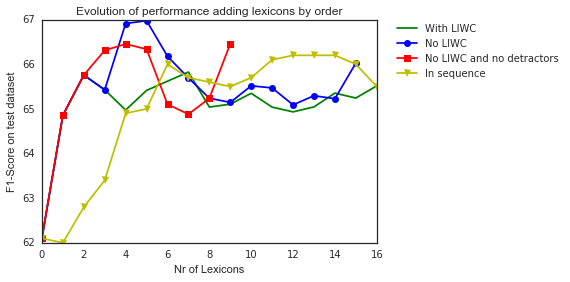

In [109]:
plt.style.use(u'seaborn-white')

# with LIWC
y = [100*v for v in [0.621087, 0.648557, 0.657575, 0.654273, 0.649746, 0.654135, 0.656203, 0.658258, 0.650412, 0.651055, 0.653488, 0.650394, 0.649333, 0.650446, 0.653532, 0.652426, 0.655164]]
x = range(len(y))
plt.plot(x,y, color="g", label='With LIWC')

# no LIWC
y = [100*v for v in [0.621087, 0.648557, 0.657575, 0.654273, 0.669122, 0.669767, 0.661762, 0.656940, 0.652401, 0.651439, 0.655168, 0.654697, 0.650900, 0.652949, 0.652268, 0.660263]]
x = range(len(y))
plt.plot(x,y, color="b", label='No LIWC', marker='o')

# removing all the detractors from no LIWC
y = [100*v for v in [0.621087, 0.648557, 0.657575, 0.663101, 0.664536, 0.663366, 0.651043, 0.648799, 0.652366, 0.664588]]
x = range(len(y))
plt.plot(x,y, color="r", label='No LIWC and no detractors', marker='s')

# adding one by one in the gene
y = [62.1, 62.0, 62.8, 63.4, 64.9, 65.0, 66.0, 65.7, 65.6, 65.5, 65.7, 66.1, 66.2, 66.2, 66.2, 66.0, 65.5]
x = range(len(y))
plt.plot(x,y, color="y", label="In sequence", marker='v')


plt.title(
        'Evolution of performance adding lexicons by order')
plt.xlabel('Nr of Lexicons')
plt.ylabel('F1-Score on test dataset')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Reoptimizing the model

In [ ]:
gs = pipe.optimize_model(pipe.LogisticRegression(), pipe.logistic_params,
                    X_train, train_labels, X_test, gold)

In [ ]:
X_train, X_test = create_ind_features(eval(df.iloc[2]['Gene']), 
                                      train_data, test_data, 
                                      train_final_tokens, test_tokens)
final_scores = pipe.predict_test_multi_proc('LogisticRegression', X_train, train_labels, X_test, gold, test_name='test')
pipe.pprint_results(final_scores, test_name='test')

Making a base score reference to compare

In [ ]:
base_scores = pipe.run_multiple_class(train_data, train_labels, test_data, gold, rnd_seed=rnd_seed, use_best_params=True)
pipe.pprint_results(base_scores)